In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sgcx198/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/sgcx198/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sgcx198/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sgcx198/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sgcx198/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incomp

In [3]:
path = '../data/'
train_data = pd.read_csv(path+'used_car_train_20200313.csv',sep = ' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv',sep=' ')


In [4]:
print(train_data.shape)
print(test_data.shape)

(150000, 31)
(50000, 30)


In [5]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [6]:
missing_values = train_data.isnull().sum()
missing_percent = (train_data.isnull().sum()/len(train_data)) * 100
missing_val_table = pd.concat([missing_values,missing_percent],axis=1)
missing_val_table = missing_val_table.rename(columns={0:'缺失值',1:'缺失率'})
missing_val_table = missing_val_table[missing_val_table.iloc[:,1] != 0].sort_values('缺失率',ascending=False)
print(missing_val_table)

           缺失值       缺失率
fuelType  8680  5.786667
gearbox   5981  3.987333
bodyType  4506  3.004000
model        1  0.000667


In [7]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [8]:
train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [9]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [10]:
test_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [11]:
train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [12]:
train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [13]:
del train_data['seller']
del test_data['seller']
del train_data['offerType']
del test_data['offerType']

In [14]:
print(train_data.shape)
print(test_data.shape)

(150000, 29)
(50000, 28)


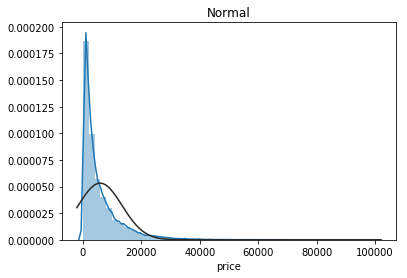

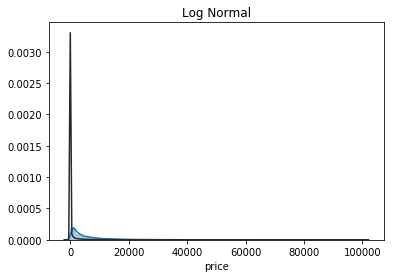

In [15]:
#查看预测变量的分布情况
import scipy.stats as st
%matplotlib inline
y = train_data['price']

plt.figure(1)
plt.title('Normal')
sns.distplot(y,fit=st.norm)

plt.figure(2)
plt.title('Log Normal')
sns.distplot(y,fit=st.lognorm)

((array([-4.43418927, -4.23918495, -4.13325226, ...,  4.13325226,
          4.23918495,  4.43418927]),
  array([   11,    11,    12, ..., 99999, 99999, 99999])),
 (6206.02382253555, 5923.327333333333, 0.8272271960645551))

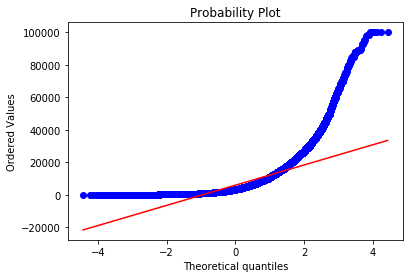

In [16]:
#q-q图
st.probplot(y, plot=plt)

((array([-4.43418927, -4.23918495, -4.13325226, ...,  4.13325226,
          4.23918495,  4.43418927]),
  array([ 2.39789527,  2.39789527,  2.48490665, ..., 11.51291546,
         11.51291546, 11.51291546])),
 (1.2151957430945006, 8.03454046825396, 0.9966572080713786))

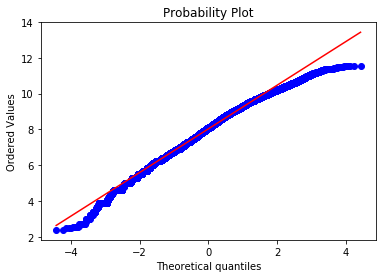

In [17]:
st.probplot(np.log(y), plot=plt)

In [18]:
#对数变换
y_log = np.log(train_data['price'])

In [19]:
y_log

0          7.522941
1          8.188689
2          8.735847
3          7.783224
4          8.556414
5          8.987197
6          8.160518
7          6.907755
8          7.955074
9          6.476972
10         8.039157
11         8.603371
12         7.377759
13         8.039157
14         8.839277
15         8.070906
16         9.259131
17         8.216088
18         6.672033
19         7.279319
20         6.897705
21         7.937375
22         5.857933
23         6.395262
24         9.132379
25         8.202482
26         7.937375
27         7.782807
28         8.496990
29         8.006034
            ...    
149970     6.802395
149971     8.131531
149972     6.906755
149973     8.160518
149974     8.411833
149975     8.291547
149976     7.090077
149977     5.799093
149978     8.116716
149979     8.517193
149980     8.377931
149981     9.104980
149982     7.600902
149983     9.392662
149984     8.809863
149985     8.342840
149986     7.937375
149987     8.006368
149988     8.922658


In [20]:
#分离预测值
y_train = train_data['price']

In [21]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [22]:
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, train_data[cat_fea].nunique()))
    print(train_data[cat_fea].value_counts(ascending=False))

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445

In [23]:
numeric_features.append('price')

In [24]:
#相关性分析
corr_matrix = train_data[numeric_features].corr()
print(corr_matrix['price'])

power        0.219834
kilometer   -0.440519
v_0          0.628397
v_1          0.060914
v_2          0.085322
v_3         -0.730946
v_4         -0.147085
v_5          0.164317
v_6          0.068970
v_7         -0.053024
v_8          0.685798
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
v_12         0.692823
v_13        -0.013993
v_14         0.035911
price        1.000000
Name: price, dtype: float64


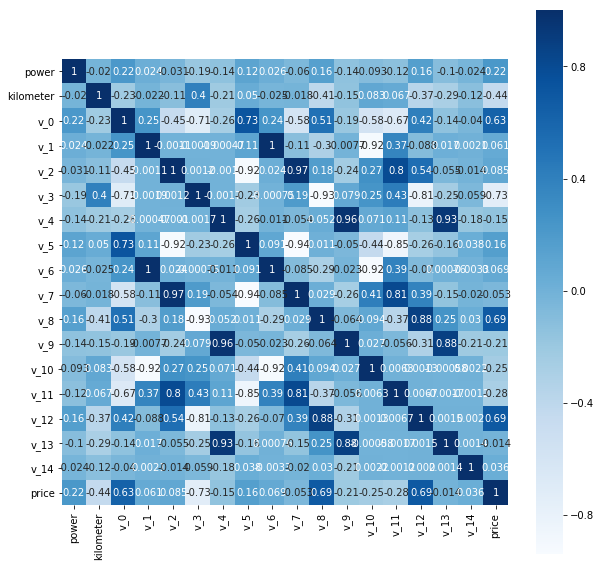

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,square=True,cmap='Blues',annot=True)

In [26]:
numeric_features.remove('price')

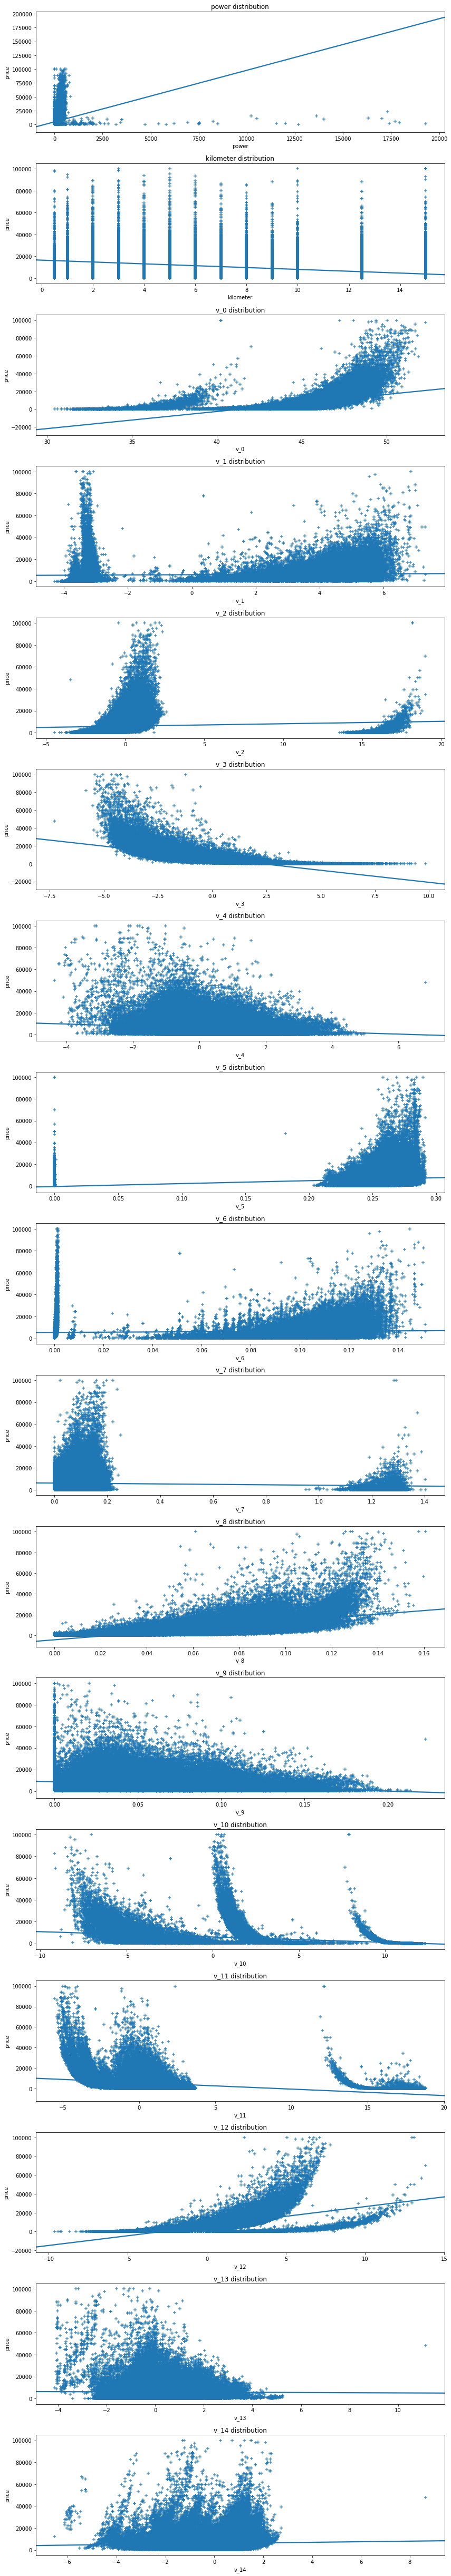

In [27]:
plt.figure(figsize=(12,68))
for i,col in enumerate(numeric_features):
    plt.subplot(17,1,i+1)
    sns.regplot(x=col,y='price',marker="+",ci=None,data=train_data)
    plt.title('%s distribution' % col)

plt.tight_layout()

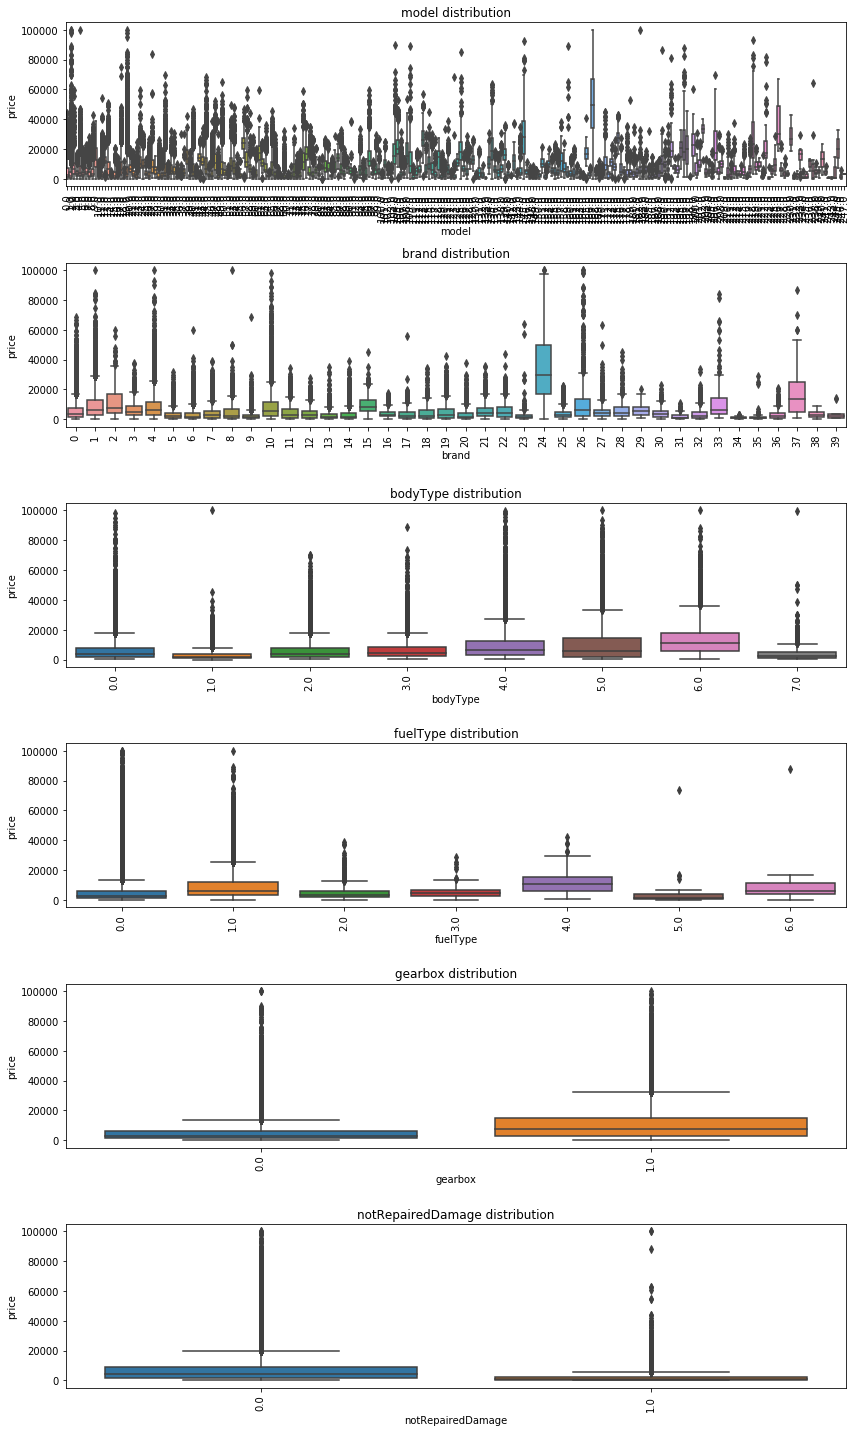

In [28]:
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

plt.figure(figsize=(12,20))
for i,col in enumerate(categorical_features):
    plt.subplot(6,1,i+1)
    sns.boxplot(x=col,y='price',data=train_data)
    plt.title('%s distribution' % col)
    plt.xticks(rotation=90)

plt.tight_layout()

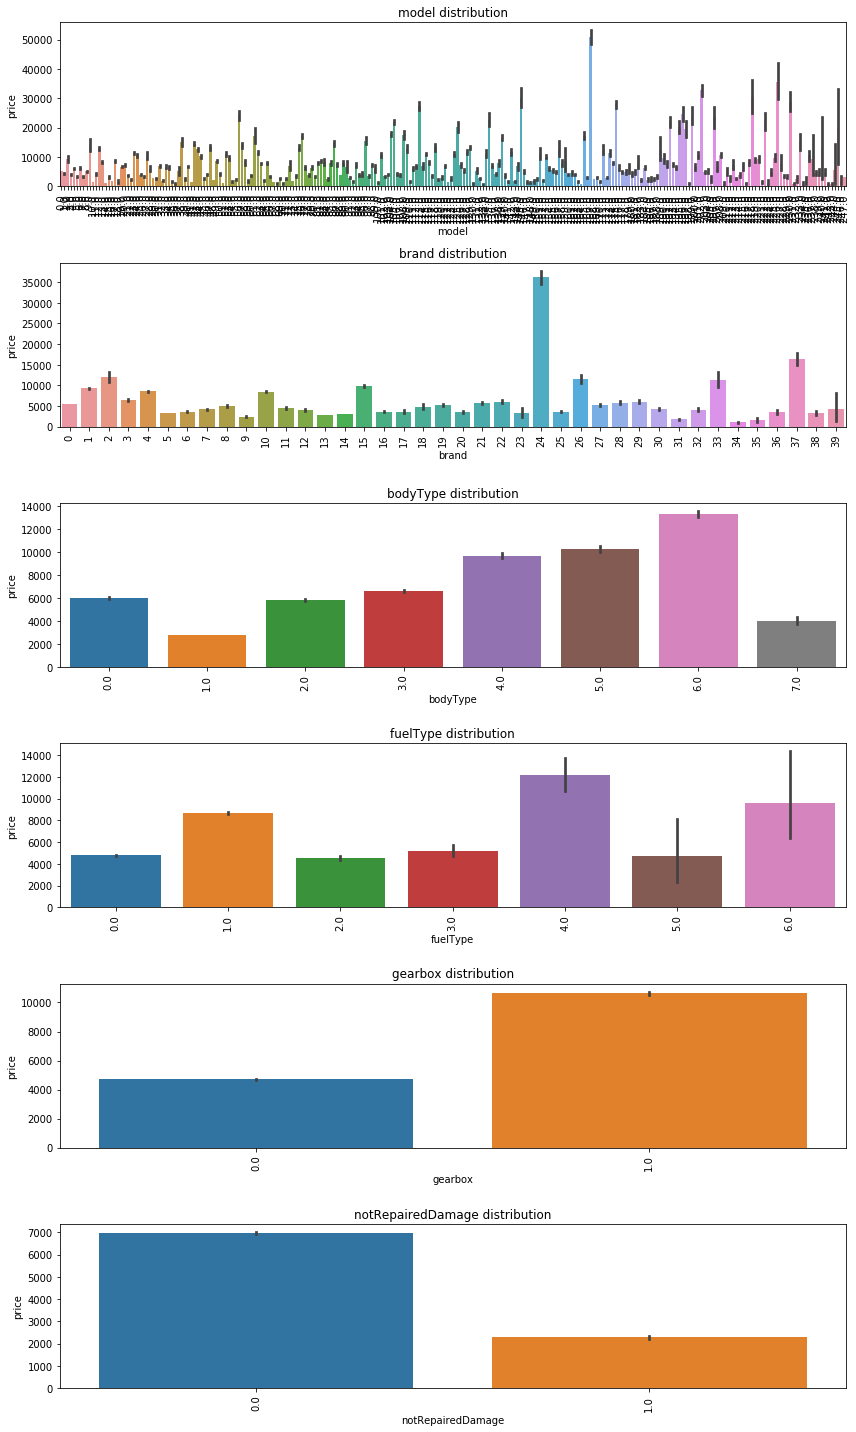

In [29]:
plt.figure(figsize=(12,20))
for i,col in enumerate(categorical_features):
    plt.subplot(6,1,i+1)
    sns.barplot(x=col,y='price',data=train_data)
    plt.title('%s distribution' % col)
    plt.xticks(rotation=90)

plt.tight_layout()

In [30]:
data = pd.concat([train_data,test_data],axis=0,ignore_index=True)

/Users/sgcx198/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [31]:
data.shape

(200000, 29)

In [32]:
#汽车使用时间
data['used_time'] = (pd.to_datetime(data['creatDate'],format='%Y%m%d',errors='coerce') - 
                     pd.to_datetime(data['regDate'],format='%Y%m%d',errors='coerce')).dt.days

In [33]:
data['used_time'].fillna(data['used_time'].mean(),inplace=True)

In [35]:
data.columns

Index(['SaleID', 'bodyType', 'brand', 'creatDate', 'fuelType', 'gearbox',
       'kilometer', 'model', 'name', 'notRepairedDamage', 'power', 'price',
       'regDate', 'regionCode', 'v_0', 'v_1', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'used_time'],
      dtype='object')

In [36]:
# data['city'].value_counts(ascending=False)

In [37]:
aggregations_brand = {
    'price':['max','min','mean','sum'],
}

aggs_brand = data.groupby('brand').agg(aggregations_brand).reset_index()

#修改列名
new_columns = ['brand']

for var,stat in aggs_brand.columns.values:
    if var != 'brand':
        new_columns.append('%s_%s' % (var,stat))

aggs_brand.columns = new_columns
print(aggs_brand.columns)

Index(['brand', 'price_max', 'price_min', 'price_mean', 'price_sum'], dtype='object')


In [38]:
data = data.merge(aggs_brand,on='brand',how='left')

In [39]:
data.shape

(200000, 34)

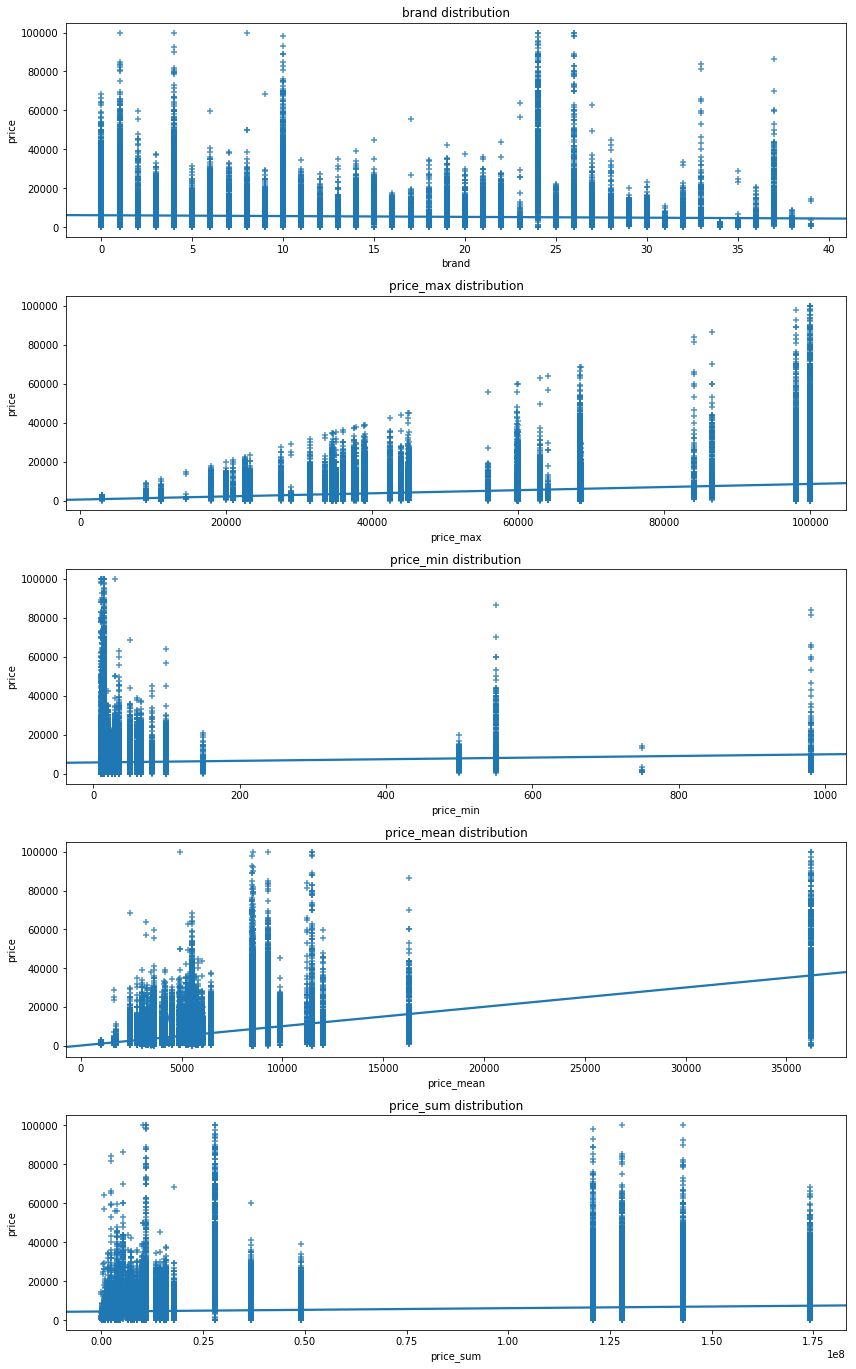

In [40]:
plt.figure(figsize=(12,68))
for i,col in enumerate(new_columns):
    plt.subplot(18,1,i+1)
    sns.regplot(x=col,y='price',marker="+",ci=None,data=data)
    plt.title('%s distribution' % col)

plt.tight_layout()

In [41]:
data.drop(['creatDate','regDate','regionCode'],axis=1,inplace=True)

In [42]:
data['price'] = np.log(data['price'])

In [43]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['bodyType', 'fuelType','gearbox', 'notRepairedDamage'])

In [44]:
minmax_features = ['power','kilometer']
       

for col in minmax_features:
    data[col] = ((data[col] - np.min(data[col])) / 
                        (np.max(data[col]) - np.min(data[col])))

In [45]:
#相关性筛选
corrs = data.corr().abs()

threshold = 0.8

upper = corrs.where(np.triu(np.ones(corrs.shape),k=1).astype('bool'))

In [46]:
upper.head()

,SaleID,brand,kilometer,model,name,power,price,v_0,v_1,v_10,...,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0
SaleID,NaN,0.000407,0.000341,0.003596,0.000308,0.001235,0.000621,0.001906,0.002396,0.002630,...,0.000702,0.000311,0.001662,0.001838,0.001876,0.002766,0.001628,0.002813,0.001715,0.002363
brand,NaN,NaN,0.098754,0.356408,0.040027,0.021740,0.077539,0.103207,0.025370,0.043908,...,0.133499,0.043648,0.006292,0.045335,0.011743,0.011258,0.016835,0.010412,0.006140,0.023076
kilometer,NaN,NaN,NaN,0.090760,0.008900,0.018015,0.377488,0.225084,0.021463,0.083005,...,0.095213,0.050317,0.003961,0.029235,0.006051,0.030402,0.045776,0.043656,0.120936,0.086708
model,NaN,NaN,NaN,NaN,0.016435,0.029609,0.126780,0.089937,0.018179,0.056797,...,0.047420,0.011980,0.018752,0.022743,0.002545,0.008795,0.007651,0.022946,0.052007,0.009319
name,NaN,NaN,NaN,NaN,NaN,0.000694,0.041470,0.122613,0.637262,0.574791,...,0.017062,0.030193,0.007721,0.003436,0.003452,0.006241,0.024470,0.022950,0.110612,0.009204


In [47]:
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
print(len(to_drop))

12


In [50]:
to_drop

['v_10',
 'v_12',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'fuelType_1.0',
 'gearbox_1.0']

In [48]:
upper.columns

Index(['SaleID', 'brand', 'kilometer', 'model', 'name', 'power', 'price',
       'v_0', 'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'used_time', 'price_max',
       'price_min', 'price_mean', 'price_sum', 'bodyType_0.0', 'bodyType_1.0',
       'bodyType_2.0', 'bodyType_3.0', 'bodyType_4.0', 'bodyType_5.0',
       'bodyType_6.0', 'bodyType_7.0', 'fuelType_0.0', 'fuelType_1.0',
       'fuelType_2.0', 'fuelType_3.0', 'fuelType_4.0', 'fuelType_5.0',
       'fuelType_6.0', 'gearbox_0.0', 'gearbox_1.0', 'notRepairedDamage_0.0',
       'notRepairedDamage_1.0'],
      dtype='object')

In [49]:
data.drop(columns=to_drop,axis=1)

,SaleID,brand,kilometer,model,name,power,price,v_0,v_1,v_11,...,bodyType_7.0,fuelType_0.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,notRepairedDamage_0.0,notRepairedDamage_1.0
0,0,6,0.827586,30.0,736,0.003107,7.522941,43.357796,3.966344,2.804097,...,0,1,0,0,0,0,0,1,1,0
1,1,1,1.000000,40.0,2262,0.000000,8.188689,45.305273,5.236112,2.096338,...,0,1,0,0,0,0,0,1,0,0
2,2,15,0.827586,115.0,14874,0.008440,8.735847,45.978359,4.823792,1.803559,...,0,1,0,0,0,0,0,1,1,0
3,3,10,1.000000,109.0,71865,0.009994,7.783224,45.687478,4.492574,1.285940,...,0,1,0,0,0,0,0,0,1,0
4,4,5,0.310345,110.0,111080,0.003521,8.556414,44.383511,2.031433,0.910783,...,0,1,0,0,0,0,0,1,1,0
5,5,10,0.655172,24.0,137642,0.005644,8.987197,46.323165,-3.229285,-2.721943,...,0,0,0,0,0,0,0,1,1,0
6,6,4,1.000000,13.0,2402,0.007767,8.160518,46.104335,4.926219,1.610616,...,0,1,0,0,0,0,0,0,1,0
7,7,14,1.000000,26.0,165346,0.005230,6.907755,42.255586,-3.167771,-0.245014,...,0,1,0,0,0,0,0,1,1,0
8,8,1,1.000000,19.0,2974,0.009269,7.955074,46.084888,4.893717,1.587796,...,0,0,0,0,0,0,0,0,1,0
9,9,7,1.000000,7.0,82021,0.004557,6.476972,43.074626,1.666386,0.600683,...,0,1,0,0,0,0,0,1,1,0


In [51]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [52]:
reduce_mem_usage(data)

Memory usage of dataframe is 48600000.00 MB
Memory usage after optimization is: 21400000.00 MB
Decreased by 56.0%


,SaleID,brand,kilometer,model,name,power,price,v_0,v_1,v_10,...,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0
0,0,6,0.827637,30.0,736,0.003107,7.523438,43.34375,3.966797,-2.880859,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.000000,40.0,2262,0.000000,8.187500,45.31250,5.234375,-4.902344,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,15,0.827637,115.0,14874,0.008438,8.734375,45.96875,4.824219,-4.847656,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,10,1.000000,109.0,71865,0.009995,7.785156,45.68750,4.492188,-4.507812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,5,0.310303,110.0,111080,0.003521,8.554688,44.37500,2.031250,-1.896484,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,5,10,0.655273,24.0,137642,0.005646,8.984375,46.31250,-3.228516,1.885742,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,4,1.000000,13.0,2402,0.007767,8.164062,46.09375,4.925781,-4.902344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,7,14,1.000000,26.0,165346,0.005230,6.906250,42.25000,-3.167969,3.693359,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,8,1,1.000000,19.0,2974,0.009270,7.953125,46.09375,4.894531,-4.925781,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,9,7,1.000000,7.0,82021,0.004559,6.476562,43.06250,1.666016,-1.089844,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
test = data[150000:].copy()
test.drop(columns='price',axis=1)

,SaleID,brand,kilometer,model,name,power,v_0,v_1,v_10,v_11,...,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0
150000,200000,0,1.000000,67.0,133777,0.005230,42.15625,-3.095703,3.619141,-0.280518,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150001,200001,6,0.379395,19.0,61206,0.003780,43.90625,-3.244141,2.998047,-1.406250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150002,200002,5,0.310303,5.0,67829,0.006214,45.37500,3.373047,-3.951172,-0.433350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
150003,200003,9,1.000000,22.0,8892,0.003004,42.78125,4.035156,-2.847656,2.800781,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150004,200004,6,1.000000,46.0,76998,0.006008,43.65625,-3.134766,2.839844,-1.660156,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150005,200005,18,1.000000,37.0,142813,0.006474,43.65625,-3.130859,2.646484,-2.441406,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150006,200006,6,1.000000,36.0,135370,0.003883,41.90625,-3.117188,3.501953,-1.248047,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
150007,200007,14,1.000000,88.0,7138,0.006474,44.87500,4.542969,-4.433594,1.144531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
150008,200008,0,0.448242,77.0,7977,0.007248,47.09375,4.433594,-5.183594,0.286865,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
150009,200009,6,1.000000,30.0,104001,0.003832,41.50000,-3.134766,3.958984,0.066406,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [54]:
train = data[:150000].copy()

In [55]:
train_id = train['SaleID'].copy()

In [56]:
train.drop(columns=['SaleID'],axis=1,inplace=True)

In [57]:
test_id = test['SaleID'].copy()

In [58]:
test.drop(columns=['SaleID'],axis=1,inplace=True)

In [59]:
y_train = train['price'].copy()
features_name = [x for x in train.columns if x not in ['price','brand','model']]
x_train = train[features_name].copy()

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [63]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          LGBMRegressor(n_estimators = 100)]

In [64]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=x_train, y=y_train, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
LGBMRegressor is finished


In [65]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,LGBMRegressor
cv1,0.188647,0.189614,0.134677,0.149076
cv2,0.190197,0.190673,0.135282,0.149878
cv3,0.190959,0.193820,0.136561,0.150430
cv4,0.186739,0.190908,0.133897,0.147431
cv5,0.191234,0.192442,0.136234,0.149740


In [66]:
x_test= test[features_name].copy()

In [67]:
!pip install bayesian-optimization

  Running setup.py bdist_wheel for bayesian-optimization ... done
  Stored in directory: /Users/sgcx198/Library/Caches/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
from bayes_opt import BayesianOptimization

In [69]:
def rf_cv(n_estimators,num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
            n_estimators=int(n_estimators),
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
        ),
        X=x_train, y=y_train, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val

In [70]:
rf_bo = BayesianOptimization(
    rf_cv,
    {
    'n_estimators':(10,500),
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples' : (2, 100)
    }
)

In [71]:
rf_bo.maximize()

|   iter    |  target   | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.865    |  96.68    |  44.71    |  184.6    |  45.95    |  0.9989   |
|  2        |  0.8553   |  21.92    |  97.48    |  263.1    |  14.72    |  0.3399   |
|  3        |  0.8697   |  56.71    |  84.62    |  340.8    |  38.45    |  0.5403   |
|  4        |  0.8454   |  81.63    |  10.59    |  58.74    |  49.55    |  0.2414   |
|  5        |  0.8718   |  65.46    |  20.85    |  323.6    |  55.29    |  0.1738   |
|  6        |  0.8659   |  99.55    |  7.786    |  499.3    |  17.83    |  0.2185   |
|  7        |  0.8647   |  92.77    |  49.0     |  182.4    |  44.32    |  0.9251   |
|  8        |  0.8776   |  80.17    |  78.39    |  497.9    |  99.82    |  0.418    |
|  9        |  0.8759   |  96.7     |  98.17    |  370.3    |  96.73    |  0.4154   |
|  10       |  0.8749   |  7.196    |  33.92    |  493

In [72]:
rf_bo.max

{'target': 0.8775763462555805,
 'params': {'max_depth': 33.88078650734442,
  'min_child_samples': 98.61298786258929,
  'n_estimators': 493.5710021649886,
  'num_leaves': 99.46816887690636,
  'subsample': 0.30223592989365056}}

In [73]:
model_bayes = LGBMRegressor(n_estimators=479,
                                   max_depth=98,
                                   min_child_samples=99,
                                   num_leaves=91,
                                   subsample=0.602)

In [74]:
scores = cross_val_score(model_bayes, X=x_train, y=y_train, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))

In [75]:
print('avg',np.mean(scores))

avg 0.1257153314558494


In [76]:
model_lgb_bayes = model_bayes.fit(x_train,y_train)

In [77]:
sub_lgb_bayes = model_lgb_bayes.predict(x_test)

In [ ]:
sub_bayes = pd.DataFrame()
sub_bayes['SaleID'] = test_id
sub_bayes['price'] = sub_lgb_bayes
# sub_bayes.to_csv('/home/tianchi/myspace/sub_lgb_bayes.csv',index=False)